# Verma Ayush 211IT079, IT479M Project
### Predicting Optimal Soil Nutrient Profiles for Different Crops Using Classification Techniques.


In [1]:
import warnings
warnings.filterwarnings("ignore")

#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

#Importing Dataset

In [ ]:
df=pd.read_csv('/content/it479Mdataset.csv')

In [ ]:
df

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143.000000,69.000000,217.000000,5.900000,0.580000,0.230000,10.200000,116.350000,59.960000,54.850000,21.290000,pomegranate
1,170.000000,36.000000,216.000000,5.900000,0.150000,0.280000,15.690000,114.200000,56.870000,31.280000,28.620000,pomegranate
2,158.000000,66.000000,219.000000,6.800000,0.340000,0.200000,15.290000,65.870000,51.810000,57.120000,27.590000,pomegranate
3,133.000000,45.000000,207.000000,6.400000,0.940000,0.210000,8.480000,103.100000,43.810000,68.500000,47.290000,pomegranate
4,132.000000,48.000000,218.000000,6.700000,0.540000,0.190000,5.590000,63.400000,56.400000,46.710000,31.040000,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
2115,155.596803,67.167995,385.008617,6.274431,1.284377,0.020733,27.659274,61.684385,57.532446,22.030540,9.112876,ragi
2116,108.581184,39.090250,210.088991,6.051593,0.270513,0.184540,13.125789,75.209067,45.333749,58.864462,38.414040,pomegranate
2117,163.808991,57.864379,255.625815,5.714219,1.538240,0.011260,12.575218,54.759587,63.369790,21.204067,2.827795,ragi
2118,108.082422,92.065000,266.917044,6.715755,0.884717,0.019848,10.481328,147.415394,63.543165,20.948705,10.626945,ragi


In [ ]:
df.shape

(2120, 12)

#Data Preprocessing

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64


#Exploratory Data Analysis

In [ ]:
print("Statistical Summary:\n", df.describe().T)

Statistical Summary:
      count        mean         std        min         25%         50%  \
N   2120.0  135.306199   34.656520  27.678729  114.000000  137.000000   
P   2120.0   52.751147   24.907323   8.205058   30.022159   54.000000   
K   2120.0  160.660551   81.354079  41.131124   88.000000  154.647467   
ph  2120.0    6.081461    0.849636   3.234914    5.512966    6.100000   
EC  2120.0    0.890866    0.650931   0.008359    0.271489    0.780000   
S   2120.0    0.394868    4.934668   0.008273    0.085894    0.159462   
Cu  2120.0   17.237526    6.580244   0.173559   12.345964   16.404618   
Fe  2120.0  114.302540   62.419388   3.637269   64.401305  104.899881   
Mn  2120.0  217.148263  341.630172  16.574353   57.900831   77.617876   
Zn  2120.0   34.550326   11.922236  15.071262   24.689520   32.120040   
B   2120.0   29.294499   19.874911   0.912032   13.717210   23.902312   

           75%          max  
N   160.834030   231.595307  
P    73.659550   118.909035  
K   207.126

##Label Encoder

In [ ]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
df

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label,label_encoded
0,143.000000,69.000000,217.000000,5.900000,0.580000,0.230000,10.200000,116.350000,59.960000,54.850000,21.290000,pomegranate,3
1,170.000000,36.000000,216.000000,5.900000,0.150000,0.280000,15.690000,114.200000,56.870000,31.280000,28.620000,pomegranate,3
2,158.000000,66.000000,219.000000,6.800000,0.340000,0.200000,15.290000,65.870000,51.810000,57.120000,27.590000,pomegranate,3
3,133.000000,45.000000,207.000000,6.400000,0.940000,0.210000,8.480000,103.100000,43.810000,68.500000,47.290000,pomegranate,3
4,132.000000,48.000000,218.000000,6.700000,0.540000,0.190000,5.590000,63.400000,56.400000,46.710000,31.040000,pomegranate,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,155.596803,67.167995,385.008617,6.274431,1.284377,0.020733,27.659274,61.684385,57.532446,22.030540,9.112876,ragi,5
2116,108.581184,39.090250,210.088991,6.051593,0.270513,0.184540,13.125789,75.209067,45.333749,58.864462,38.414040,pomegranate,3
2117,163.808991,57.864379,255.625815,5.714219,1.538240,0.011260,12.575218,54.759587,63.369790,21.204067,2.827795,ragi,5
2118,108.082422,92.065000,266.917044,6.715755,0.884717,0.019848,10.481328,147.415394,63.543165,20.948705,10.626945,ragi,5


##Label Mapping

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label encoding mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} -> {encoded_value}")

Label encoding mapping:
grapes -> 0
mango -> 1
mulberry -> 2
pomegranate -> 3
potato -> 4
ragi -> 5


In [17]:
label=['grapes','mango','mulberry','pomegranate','potato','ragi']

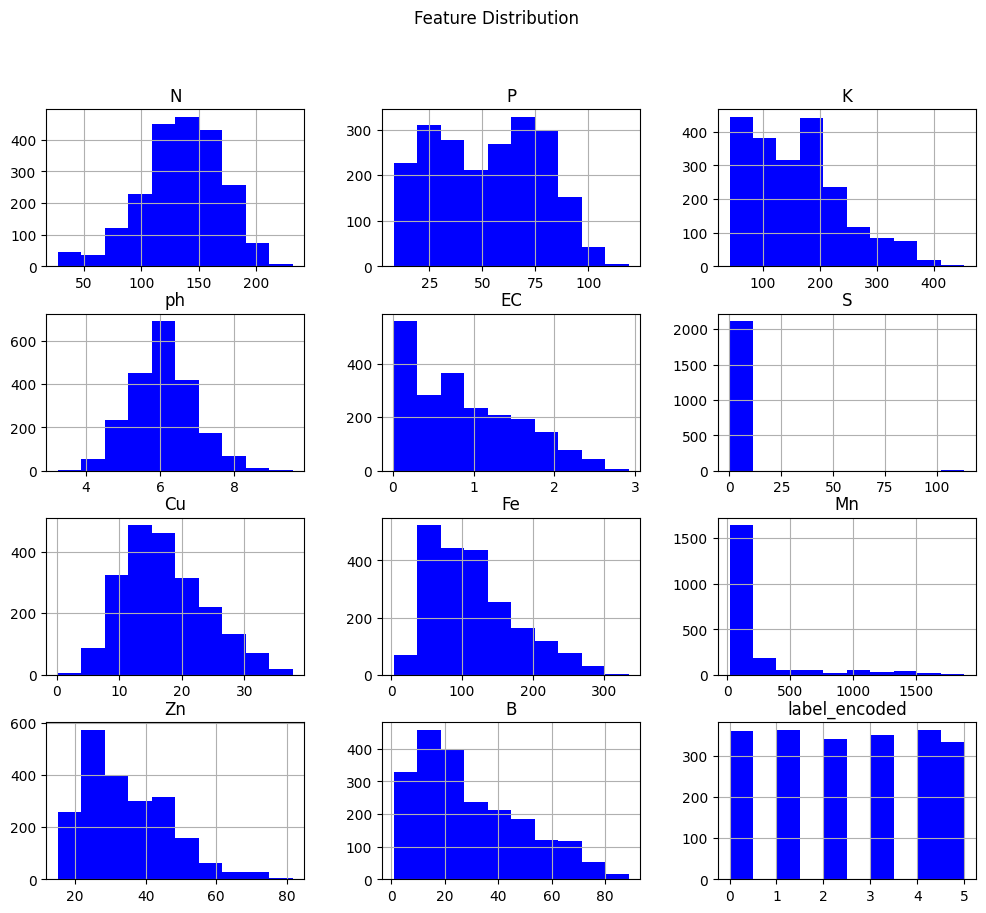

In [ ]:
df.hist(bins=10, figsize=(12, 10), color='blue')
plt.suptitle('Feature Distribution')
plt.show()

In [ ]:
df1=df.drop(columns=['label'])

##Correlation Matrix

In [ ]:
correlation_matrix = df1.corr()

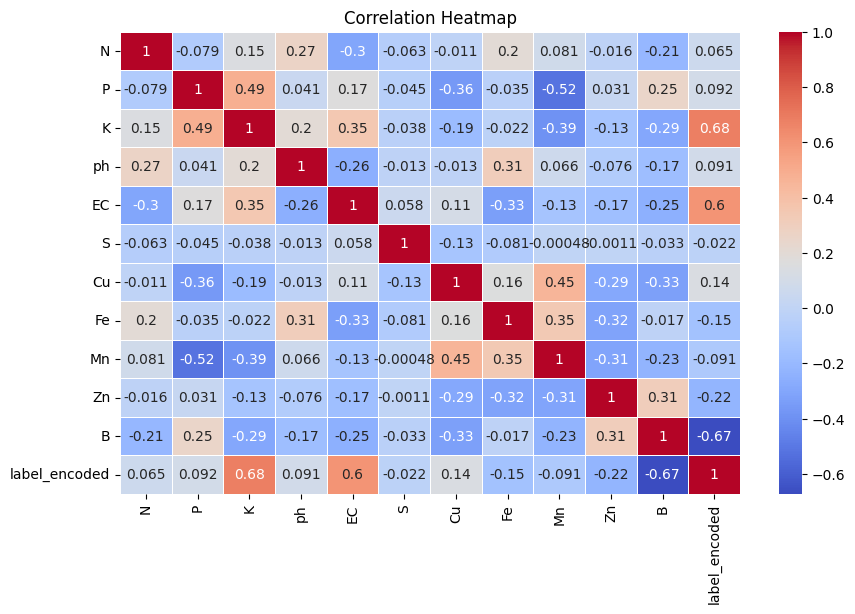

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##Countplot of labels

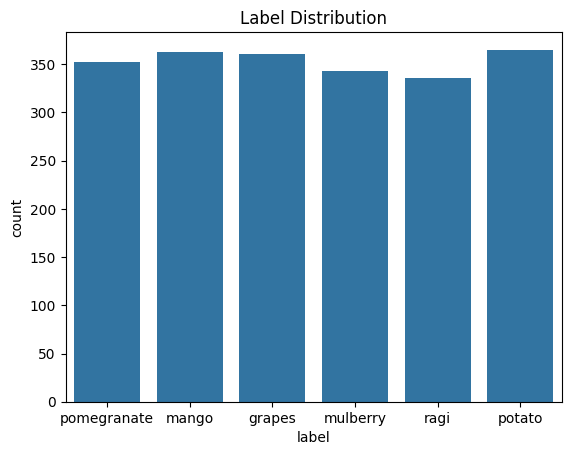

In [ ]:
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()

#Features Scaling and applied datapreprocessed

In [ ]:
numerical_features = df.drop(columns=['label', 'label_encoded'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

In [ ]:
with open('scalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

In [ ]:
df_preprocessed = pd.concat([df_scaled, df['label_encoded']], axis=1)

In [ ]:
df_preprocessed

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label_encoded
0,0.222054,0.652526,0.692685,-0.213626,-0.477683,-0.033418,-1.069745,0.032809,-0.460221,1.703075,-0.402839,3
1,1.001312,-0.672698,0.680390,-0.213626,-1.138431,-0.023283,-0.235233,-0.001643,-0.469268,-0.274369,-0.033945,3
2,0.654975,0.532052,0.717275,0.845901,-0.846473,-0.039499,-0.296035,-0.776104,-0.484083,1.893521,-0.085782,3
3,-0.066560,-0.311273,0.569736,0.375000,0.075501,-0.037472,-1.331196,-0.179514,-0.507505,2.848265,0.905652,3
4,-0.095422,-0.190798,0.704980,0.728176,-0.539148,-0.041526,-1.770493,-0.815685,-0.470644,1.020156,0.087845,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2115,0.585615,0.578956,2.758325,0.227174,0.604679,-0.075836,1.584167,-0.843177,-0.467328,-1.050368,-1.015672,5
2116,-0.771322,-0.548599,0.607715,-0.035162,-0.953248,-0.042633,-0.625008,-0.626451,-0.503044,2.039875,0.458955,3
2117,0.822631,0.205339,1.167583,-0.432337,0.994770,-0.077756,-0.708698,-0.954143,-0.450238,-1.119707,-1.331978,5
2118,-0.785717,1.578778,1.306407,0.746723,-0.009449,-0.076015,-1.026982,0.530615,-0.449730,-1.141131,-0.939474,5


#Seperating features and Labels

In [ ]:
X = df_preprocessed.drop(columns=['label_encoded'])
y = df_preprocessed['label_encoded']

In [ ]:
X

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
0,0.222054,0.652526,0.692685,-0.213626,-0.477683,-0.033418,-1.069745,0.032809,-0.460221,1.703075,-0.402839
1,1.001312,-0.672698,0.680390,-0.213626,-1.138431,-0.023283,-0.235233,-0.001643,-0.469268,-0.274369,-0.033945
2,0.654975,0.532052,0.717275,0.845901,-0.846473,-0.039499,-0.296035,-0.776104,-0.484083,1.893521,-0.085782
3,-0.066560,-0.311273,0.569736,0.375000,0.075501,-0.037472,-1.331196,-0.179514,-0.507505,2.848265,0.905652
4,-0.095422,-0.190798,0.704980,0.728176,-0.539148,-0.041526,-1.770493,-0.815685,-0.470644,1.020156,0.087845
...,...,...,...,...,...,...,...,...,...,...,...
2115,0.585615,0.578956,2.758325,0.227174,0.604679,-0.075836,1.584167,-0.843177,-0.467328,-1.050368,-1.015672
2116,-0.771322,-0.548599,0.607715,-0.035162,-0.953248,-0.042633,-0.625008,-0.626451,-0.503044,2.039875,0.458955
2117,0.822631,0.205339,1.167583,-0.432337,0.994770,-0.077756,-0.708698,-0.954143,-0.450238,-1.119707,-1.331978
2118,-0.785717,1.578778,1.306407,0.746723,-0.009449,-0.076015,-1.026982,0.530615,-0.449730,-1.141131,-0.939474


In [ ]:
y

,label_encoded
0,3
1,3
2,3
3,3
4,3
...,...
2115,5
2116,3
2117,5
2118,5


# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
print("Size of X_train :",X_train.shape)
X_train

Size of X_train : (1696, 11)


,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
1870,-2.851901,-0.242746,-0.666107,0.418919,0.899619,-0.059883,-0.341519,-1.336838,-0.142320,0.906395,-0.598463
1689,1.847612,-1.299530,-1.209273,-0.539205,-0.795506,-0.030308,-0.113502,2.132576,0.496862,-0.281062,-0.989716
1555,-0.279079,-0.281725,0.181934,-2.332087,1.175575,-0.057339,-0.940278,-1.242658,0.141657,-0.567558,-0.577659
2029,-0.994849,-1.272449,-0.318262,-0.237608,1.083917,-0.058053,0.795471,-1.171583,-0.348917,0.311529,-0.847874
772,-1.594081,0.152280,-0.754969,-0.588099,1.821756,-0.064860,-0.244772,-1.305517,-0.425928,1.026641,-0.580237
...,...,...,...,...,...,...,...,...,...,...,...
1480,-0.532554,-0.041224,-0.145982,-1.042322,1.681765,-0.060816,-0.664793,-1.127279,-0.020544,-1.273906,-0.929768
808,0.493502,-0.305878,-0.984687,-0.330333,-1.178075,-0.049208,-0.918648,-0.077737,-0.454746,1.022516,0.729942
1706,-0.862666,1.091996,-0.232591,-0.113339,0.388729,-0.005716,0.476687,1.624078,-0.489789,-0.122632,0.986835
1037,1.862830,1.404812,1.596677,0.586511,0.116784,-0.075481,-1.050196,0.695481,-0.440791,-1.073492,-1.238409


In [ ]:
print("Size of X_test :",X_test.shape)
X_test

Size of X_test : (424, 11)


,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
1935,-1.253594,0.524844,-1.157414,0.145558,-1.124330,-0.049344,0.527494,-0.991734,-0.324102,-0.294278,0.143132
737,-0.464505,-0.713704,-0.552923,0.079976,-1.042229,-0.051654,-0.586353,0.702182,-0.304523,1.015183,0.960241
280,0.135470,-0.230956,-0.831876,-0.331351,-1.184530,-0.053080,-0.267154,-0.188007,-0.238379,-0.109093,-0.010292
1741,0.955576,-0.213736,0.279074,-0.088652,-1.160899,-0.049021,-0.119135,-0.675127,-0.506230,1.700807,0.040454
1701,-0.818431,-0.104527,-1.159891,-1.229665,-1.199507,-0.072371,1.058987,0.140173,-0.329489,1.347867,0.623529
...,...,...,...,...,...,...,...,...,...,...,...
307,-0.441758,-0.793173,-0.745812,-0.331351,-1.030868,-0.053485,-0.856937,0.480693,-0.271171,1.121671,0.923769
997,1.107855,-0.855542,-0.933636,0.797015,0.131988,-0.036010,1.225494,1.594297,3.791110,-1.106299,-0.280273
447,0.452945,1.455693,1.959054,0.257275,-0.416219,-0.075255,0.850089,-0.443918,-0.466633,-1.365026,-1.373638
1308,-0.234768,-1.256315,-0.525566,1.815509,-0.081521,-0.028870,0.012577,1.275147,3.824678,-1.148693,-0.248631


In [ ]:
print("Size of y_train :",y_train.shape)
y_train

Size of y_train : (1696,)


,label_encoded
1870,4
1689,2
1555,4
2029,4
772,4
...,...
1480,4
808,0
1706,1
1037,5


In [ ]:
print("Size of y_test :",y_test.shape)
y_test

Size of y_test : (424,)


,label_encoded
1935,0
737,1
280,0
1741,3
1701,0
...,...
307,0
997,2
447,5
1308,2


# Train and test the dataset using 4 different ML and 1 DL algorithms for accurate crop type classification based on soil nutrients input.

## 1. Decision Tree

Accuracy of DT: 0.9433962264150944
Precision of DT: 0.9440670178877726
Recall of DT: 0.9433962264150944
F1-score of DT: 0.9435705139304132

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.90      0.95      0.92        73
           2       0.97      0.97      0.97        69
           3       0.89      0.89      0.89        70
           4       1.00      0.99      0.99        73
           5       0.95      0.94      0.95        67

    accuracy                           0.94       424
   macro avg       0.94      0.94      0.94       424
weighted avg       0.94      0.94      0.94       424




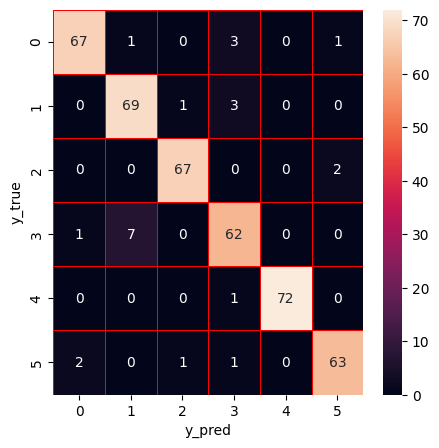

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print()
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
print()
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

## 2. Random Forests

Accuracy of RF: 0.9764150943396226
Precision of RF: 0.9766401233981078
Recall of RF: 0.9764150943396226
F1-score of RF: 0.9763940329348025

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.96      0.97      0.97        73
           2       0.99      0.97      0.98        69
           3       0.99      0.94      0.96        70
           4       1.00      1.00      1.00        73
           5       0.96      0.99      0.97        67

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424




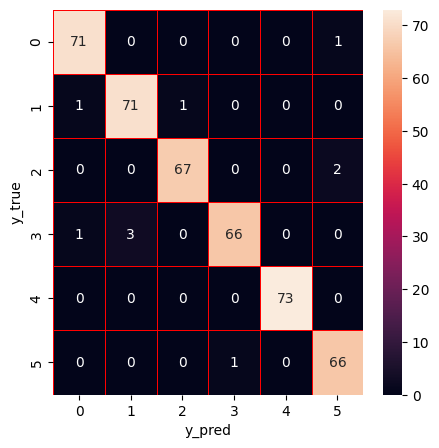

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print()
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
print()
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

## 3. Extra Trees

Accuracy of ET: 0.9834905660377359
Precision of ET: 0.983947796099572
Recall of ET: 0.9834905660377359
F1-score of ET: 0.9835385556051428

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      0.99      0.97        73
           2       0.99      0.97      0.98        69
           3       1.00      0.97      0.99        70
           4       1.00      1.00      1.00        73
           5       0.96      1.00      0.98        67

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424




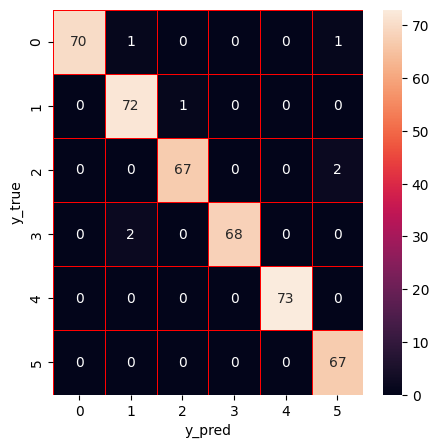

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print()
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
print()
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

## 4. XG Boost

Accuracy of XGBoost: 0.9740566037735849
Precision of XGBoost: 0.9747009021835559
Recall of XGBoost: 0.9740566037735849
F1-score of XGBoost: 0.9741358051790384

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.95      0.97      0.96        73
           2       0.99      0.96      0.97        69
           3       0.97      0.96      0.96        70
           4       1.00      0.99      0.99        73
           5       0.94      1.00      0.97        67

    accuracy                           0.97       424
   macro avg       0.97      0.97      0.97       424
weighted avg       0.97      0.97      0.97       424




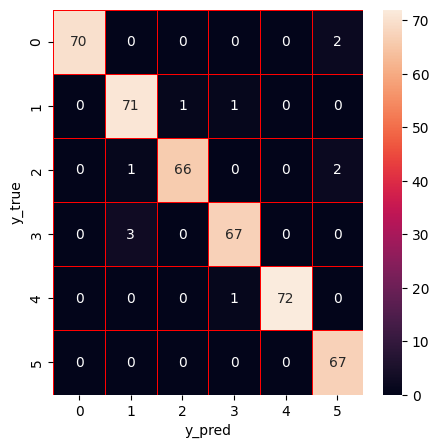

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print()
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print()
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

## 5. Multilayer Perceptron

Accuracy of MLP Classifier: 0.9599056603773585
Precision of MLP Classifier: 0.961288067050013
Recall of MLP Classifier: 0.9599056603773585
F1-score of MLP Classifier: 0.9599515214079913

               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.90      0.96      0.93        73
           2       0.98      0.94      0.96        69
           3       0.98      0.90      0.94        70
           4       1.00      1.00      1.00        73
           5       0.94      0.99      0.96        67

    accuracy                           0.96       424
   macro avg       0.96      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424



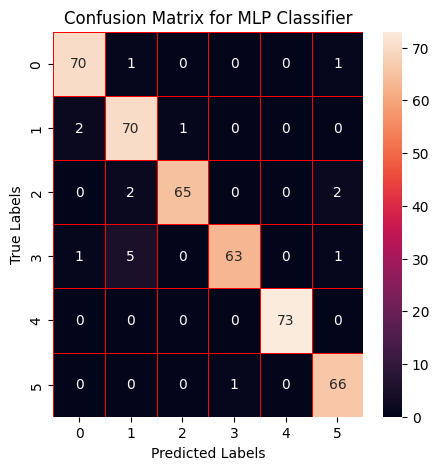

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),max_iter=1000,activation='relu',solver='adam',random_state=42)
mlp.fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)
y_true = y_test
print('Accuracy of MLP Classifier: ' + str(mlp_score))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of MLP Classifier: ' + str(precision))
print('Recall of MLP Classifier: ' + str(recall))
print('F1-score of MLP Classifier: ' + str(fscore))
print("\n",classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=None)  # Remove 'ax=ax' here
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MLP Classifier")
plt.show()

In [ ]:
mlp_train = mlp.predict(X_train)
mlp_test = mlp.predict(X_test)

# Stacking model construction (ensemble for 4 base learners)


In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
     'MLP classification' : mlp_train.ravel(),
    })

In [ ]:
base_predictions_train

,DecisionTree,RandomForest,ExtraTrees,XgBoost,MLP classification
0,4,4,4,4,4
1,2,2,2,2,2
2,4,4,4,4,4
3,4,4,4,4,4
4,4,4,4,4,4
...,...,...,...,...,...
1691,4,4,4,4,4
1692,0,0,0,0,0
1693,1,1,1,1,1
1694,5,5,5,5,5


# Generating Trained Models for Different labels Prediction in .pkl

In [ ]:
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [ ]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
with open('et_model.pkl', 'wb') as f:
    pickle.dump(et, f)

In [ ]:
with open('xg_model.pkl', 'wb') as f:
    pickle.dump(xg, f)

In [ ]:
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp, f)

In [ ]:
with open('scalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Opening Models for testing different crops types

In [3]:
with open('dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

In [4]:
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [5]:
with open('et_model.pkl', 'rb') as f:
    et_model = pickle.load(f)

In [6]:
with open('xg_model.pkl', 'rb') as f:
    xg_model = pickle.load(f)

In [7]:
with open('mlp_model.pkl', 'rb') as f:
    mlp_model = pickle.load(f)

# Scaling Inputs

In [8]:
def scale_input_row(input_row, scaler_path='scalar.pkl'):
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    input_row = np.array(input_row)
    input_row = input_row.reshape(1, -1)
    scaled_row = scaler.transform(input_row)
    return scaled_row

# 11 nutrients Inputs as (N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B)

In [9]:
sample_input = [106.45360486265058, 85.8445733844807, 195.67329503888843, 7.31083990770808, 1.0060845424896434, 0.2743182155004966, 11.47665277548555, 151.55595469270216, 46.59783810755304, 30.650411458830817, 63.90416308449554]
scaled_sample = scale_input_row(sample_input)
print(scaled_sample)
sample_input=scaled_sample

[[-0.83272648  1.328976    0.43047632  1.44728831  0.1770479  -0.02443502
  -0.87568672  0.59696522 -0.49934308 -0.32718985  1.74178542]]


# Evaluation of input WRT 5 models

In [10]:
dt_prediction = dt_model.predict(sample_input)

In [11]:
rf_prediction = rf_model.predict(sample_input)

In [12]:
et_prediction = et_model.predict(sample_input)

In [13]:
xg_prediction = xg_model.predict(sample_input)

In [14]:
mlp_prediction = mlp_model.predict(sample_input)

# Results :

In [18]:
print("Decision Tree Prediction:",label[dt_prediction[0]])

Decision Tree Prediction: mango


In [19]:
print("Random Forest Prediction:",label[rf_prediction[0]])

Random Forest Prediction: mango


In [20]:
print("Extra Trees Prediction:",label[et_prediction[0]])

Extra Trees Prediction: mango


In [21]:
print("XGBoost Prediction:",label[xg_prediction[0]])

XGBoost Prediction: mango


In [22]:
print("Multilayer Perceptron prediction:",label[mlp_prediction[0]])

Multilayer Perceptron prediction: mango
